In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import cv2
from os import listdir
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from scipy import ndimage, misc
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization, Activation
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
import warnings
from PIL import Image
import IPython.display as display
import random
from numpy.random import choice
import matplotlib.pyplot as plt, zipfile
import os
from IPython.display import FileLink, FileLinks
import time

In [2]:
###########LOADING DATA###############
loaded_images = list()
loaded_y = list()
breed_y = list()
X_test = list()
img_size =64
!pwd
path ='./Images/'
clas_folder = path
dict={}
list_clas_folder = listdir(clas_folder)
title = [a.split('-')[1] for a in list_clas_folder]

/home/ecbm4040/stanford_results


classes_complete= 0
classes_complete= 20
classes_complete= 40
classes_complete= 60
./Images/n02105855-Shetland_sheepdog/n02105855_2933.jpg
classes_complete= 80
classes_complete= 100
Data Loaded


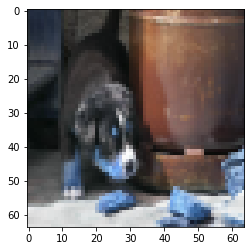

In [3]:
###########LOADING DATA###############

num_classes = len(list_clas_folder)
for i in range(num_classes):
    if i%20 ==0:
        print("classes_complete=",i)
    dict[str(i)] = list_clas_folder[i]
    folder_name = list_clas_folder[i]
    image_path = clas_folder + folder_name
    for filename in listdir(image_path):
        im2 = cv2.imread(image_path +'/'+ filename, cv2.IMREAD_UNCHANGED)
        img_data = cv2.resize(im2, (img_size, img_size),interpolation = cv2.INTER_AREA)
        if img_data.shape == (img_size, img_size, 3):
            loaded_images.append(img_data)
            loaded_y.append(i)
            breed_y.append(title[i])
        else: 
            print(image_path +'/'+ filename)
print("Data Loaded")
plt.imshow(loaded_images[7])


shuffling..
(64, 64, 3)


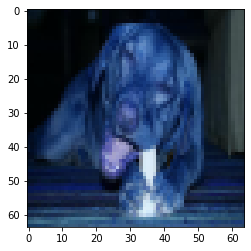

In [4]:
###########LOADING DATA###############

seq = np.arange(len(loaded_y))
np.random.shuffle(seq)
print("shuffling..")
len(seq)
X_train1 = list()
y_train1 = list()
breed_shuff = list()
for i in range(len(seq)):
    X_train1.append(loaded_images[seq[i]])
    y_train1.append(loaded_y[seq[i]])
    breed_shuff.append(breed_y[seq[i]])
print(X_train1[10].shape)
X_train = np.asarray(X_train1)
plt.imshow(X_train[3])

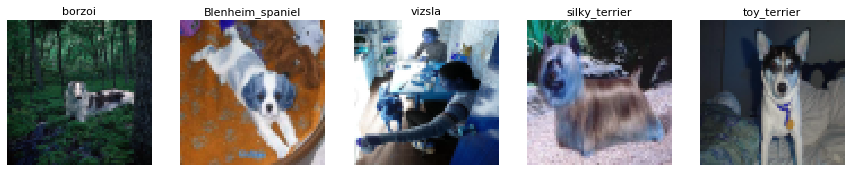

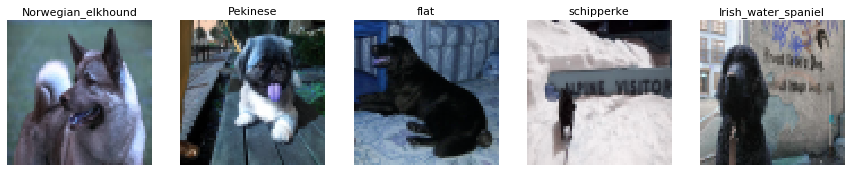

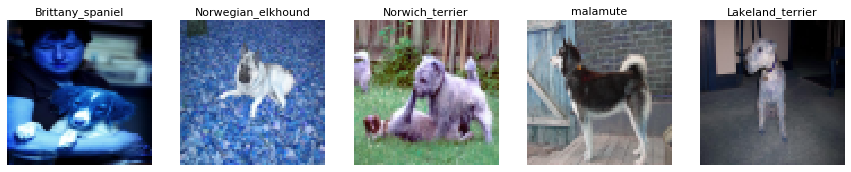

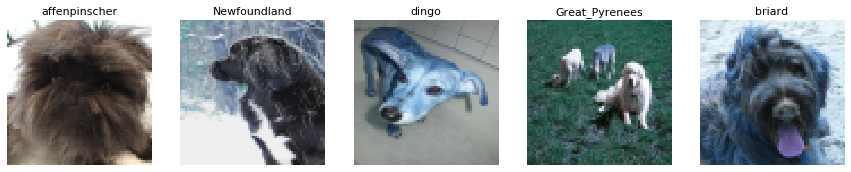

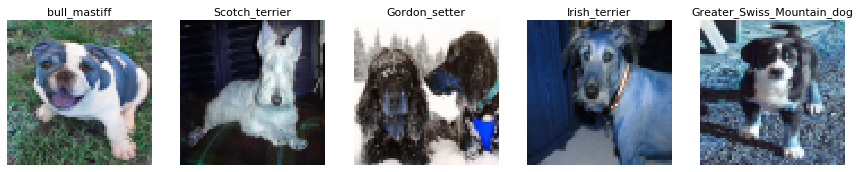

In [5]:
###########LOADING DATA###############

x = np.random.randint(0,len(X_train),25)
for k in range(5):
    plt.figure(figsize=(15,3))
    for j in range(5):
        plt.subplot(1,5,j+1)
        img = Image.fromarray( X_train[x[k*5 + j],:,:,:].astype('uint8') )
        plt.axis('off')
        plt.title(breed_shuff[x[(k*5 + j)]],fontsize=11)
        plt.imshow(img)
    plt.show()

In [6]:
###########LOADING DATA###############

X_train = (X_train[:len(X_train),:,:,:])*(1.0/255.0)

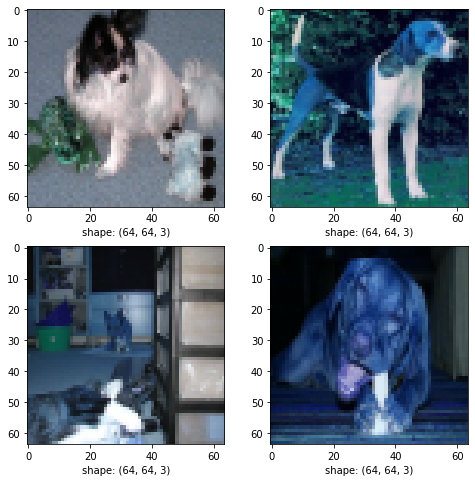

In [7]:
###########LOADING DATA###############

plt.figure(figsize=(8,8))
for image in range(4):
    plt.subplot(2,2, image+1)
    plt.imshow((X_train[image]))
    plt.xlabel('shape: {}'.format(X_train[image].shape))

In [8]:
###########LOADING DATA###############
X_train1 = tf.cast(X_train[:10000],'float32') 
X_train2 = tf.cast(X_train[10000:],'float32') 
X_train = tf.concat([X_train1, X_train2], 0)

In [28]:
###########Defining model parameters###############

buffer = 20000
batch_size = 16
start_weights = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.2)
dim = 64
max_epochs = 300
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [10]:
###########Defining model parameters###############
dog_images = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer).batch(batch_size)
print(dog_images)

<DatasetV1Adapter shapes: (?, 64, 64, 3), types: tf.float32>


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32768)             3276800   
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32768)             131072    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32768)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 512)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 256)       3276800   
_________________________________________________________________
batch_normalization_v

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 64, 64, 3)


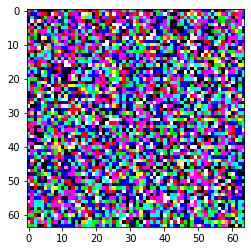

In [11]:
###########Defining Generator Model###############
### TENSORFLOW TUTORIAL
def generator_creator():
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(8*8*512, use_bias=False, input_shape=(100,)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Reshape((8, 8, 512)),
    
            tf.keras.layers.Conv2DTranspose(256, (5,5), strides=(2,2), padding='same', use_bias=False,\
                kernel_initializer=start_weights),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Dropout(0.3),
            
            tf.keras.layers.Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', use_bias=False,\
                kernel_initializer=start_weights),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Dropout(0.3),
            
            tf.keras.layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False,\
                kernel_initializer=start_weights),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            
            tf.keras.layers.Dense(3,activation='sigmoid', use_bias=False,\
                kernel_initializer=start_weights)
        ]
    )
    return model
generator = generator_creator()
print(generator.summary())
noise = tf.random.normal([1,100])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, :])
print(generated_image.shape)

In [12]:
###########Defining smaller Discriminator Model###############
### TENSORFLOW TUTORIAL
def discriminator_creator():
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(64, (4,4), strides=(2,2), padding='same', input_shape=[dim,dim,3],kernel_initializer=start_weights),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Conv2D(128, (4,4), strides=(2,2), padding='same',kernel_initializer=start_weights),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),            
            tf.keras.layers.Conv2D(256, (4,4), strides=(2,2), padding='same',kernel_initializer=start_weights),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ]
    )
    return model
discriminator = discriminator_creator()
print(discriminator.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        3136      
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       131200    
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         524544    
__________

In [32]:
###########Defining Label Modifier for gradients in Loss function###############

def smooth_pos_label(y):
    return y - 0.3 + (np.random.random(y.shape) * 0.3)
def smooth_neg_label(y):
    return y + (np.random.random(y.shape) * 0.2)

In [39]:
###########Defining Generator and Discriminator Losses###############
### TENSORFLOW TUTORIAL
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)
def discriminator_loss(real, fake):
    real_smooth = smooth_pos_label(tf.ones_like(real))
    fake_smooth = smooth_neg_label(tf.zeros_like(fake))
    loss = cross_entropy(real_smooth, real) + cross_entropy(fake_smooth, fake)
    return loss

def generator_loss(fake):
    fake_smooth = smooth_neg_label(tf.ones_like(fake))
    return cross_entropy(fake_smooth, fake)

generator_optimizer = tf.train.AdamOptimizer(learning_rate=0.0001, beta1 =0.6)
discriminator_optimizer = tf.train.AdamOptimizer(learning_rate=0.0001, beta1 =0.6)

In [15]:
###########Defining one training step for each batch###############
### TENSORFLOW TUTORIAL
def train_step(images, G_loss_list, D_loss_list):
    noise = tf.random.normal([batch_size, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        
    G_loss_list.append(gen_loss.numpy())
    D_loss_list.append(disc_loss.numpy())
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    

In [16]:
###########Defining Training###############
### TENSORFLOW TUTORIAL
def train(dataset, epochs):
    for epoch in range(epochs):
        Gen_loss = []
        Dis_loss = []
        start = time.time()
        for batch in dataset:
            train_step(batch, Gen_loss, Dis_loss)
        plot_loss(Gen_loss, Dis_loss, epoch)
        if (epoch % 10 == 0):
            display.clear_output(wait=True)
            gen_save_image(generator,epoch + 1,seed)
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))   
    print("Final Epoch")
    gen_save_image(generator,epochs,seed)

In [42]:
###########Defining image printing and saving###############

def gen_save_image(model, epoch, test_input):
    predictions = model(test_input, training=False)    
    fig = plt.figure(figsize=(8,8))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i, :, :, :]))
        plt.axis('off')
    plt.savefig('images_64/image_at_epoch_{}.png'.format(epoch+330))
    if epoch % 10 == 0 :
        plt.show()

In [18]:
###########Plot of loss function###############
# function by Nanashi

def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH {}".format(epoch+1))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Time for epoch 91 is 40.29753351211548 sec


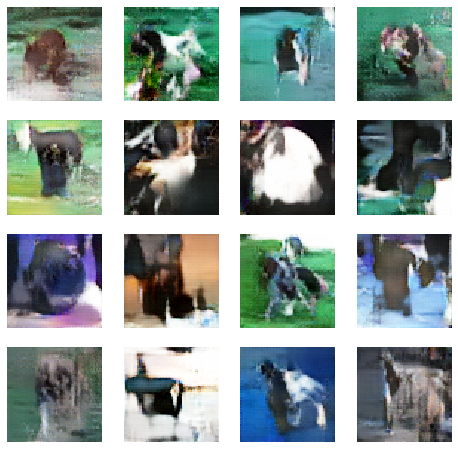

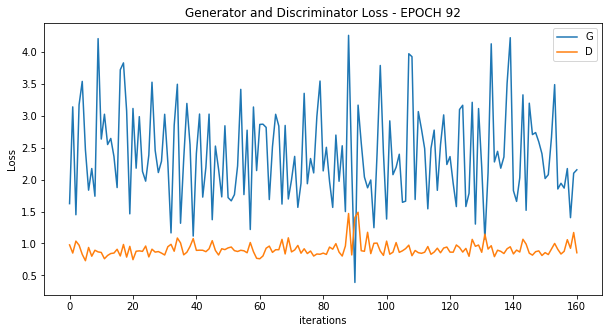

Time for epoch 92 is 40.386324405670166 sec


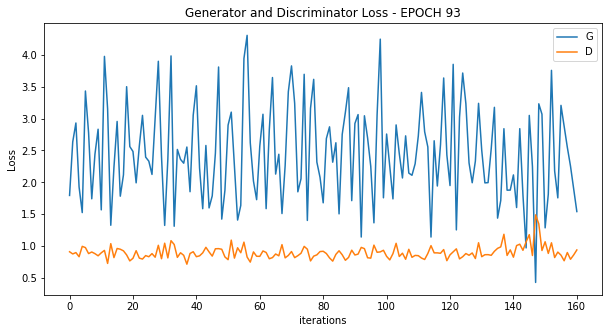

Time for epoch 93 is 39.90888690948486 sec


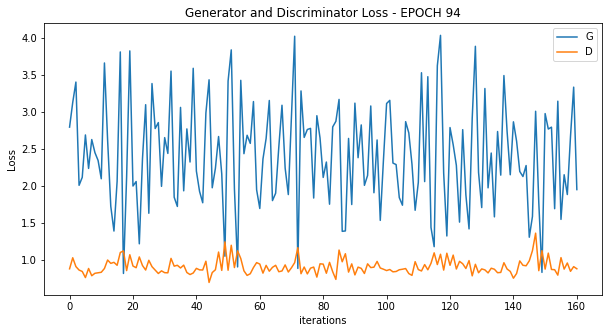

Time for epoch 94 is 39.96197247505188 sec


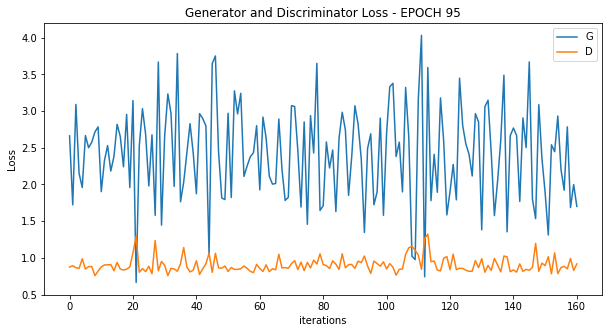

Time for epoch 95 is 40.238441944122314 sec


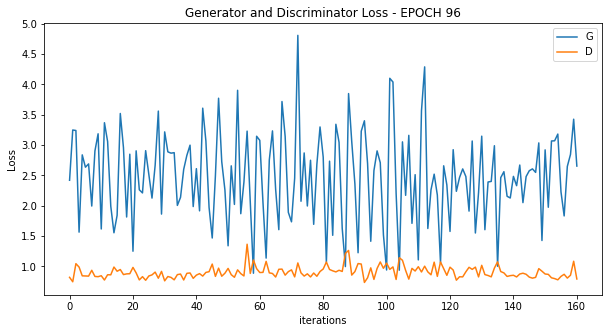

Time for epoch 96 is 40.119877099990845 sec


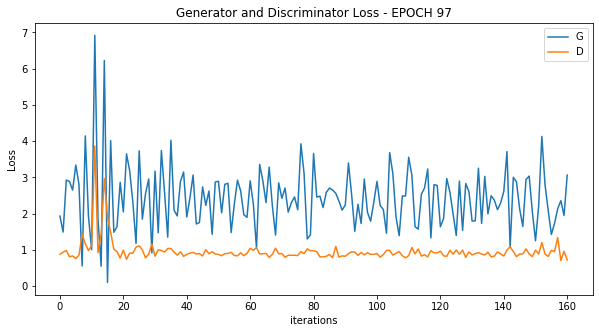

Time for epoch 97 is 39.98906874656677 sec


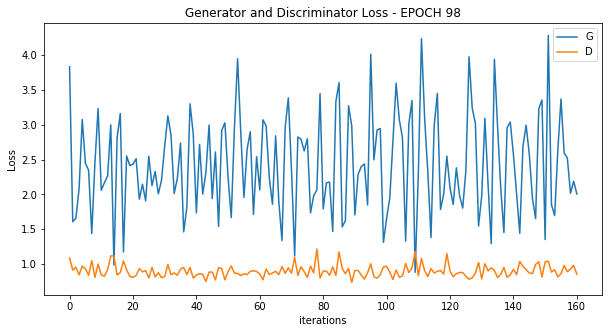

Time for epoch 98 is 39.88628005981445 sec


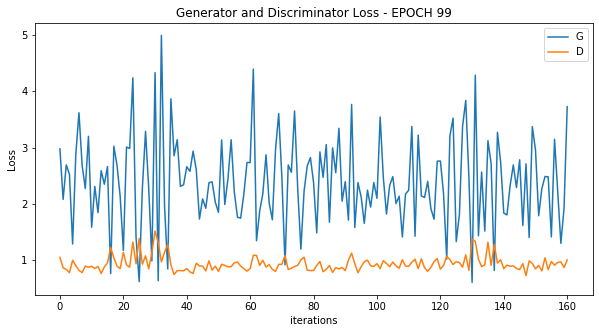

Time for epoch 99 is 40.03243160247803 sec


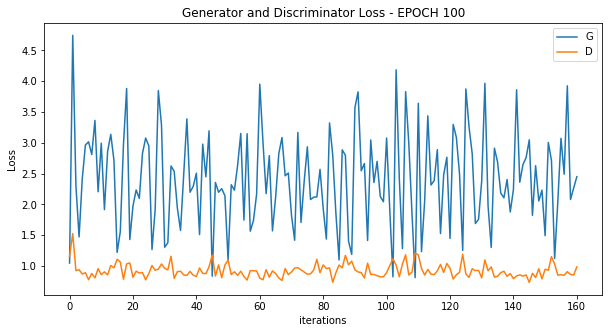

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Time for epoch 100 is 40.16598105430603 sec
Final Epoch


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


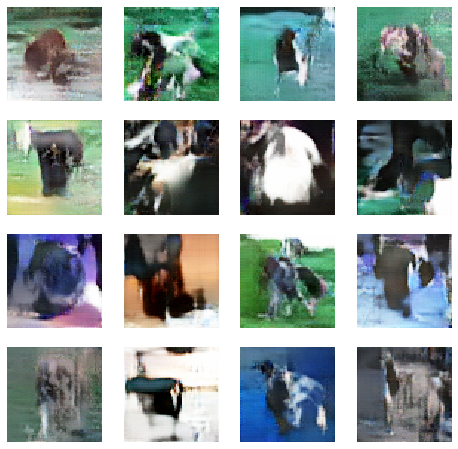

CPU times: user 40min 22s, sys: 7min 12s, total: 47min 35s
Wall time: 1h 6min 54s


In [43]:
%%time
print('Starting training')
train(dog_images, max_epochs)

In [46]:
%%time
### model save and image generator

save_ = zipfile.PyZipFile('images_400epoch.zip', mode='w')
filename = 'gen_dogs_64_400_epochs.h5'
tf.keras.models.save_model(
    generator,
    filename,
    overwrite=True,
    include_optimizer=True
)
for k in range(500):
    generated_image = generator(tf.random.normal([1, noise_dim]), training=False)
    f = str(k)+'.png'
    img = ((generated_image[0,:,:,:]+1.)/2.).numpy()
    tf.keras.preprocessing.image.save_img(f,img,scale=True)
    save_.write(f); os.remove(f)
save_.close()


CPU times: user 6.75 s, sys: 503 ms, total: 7.25 s
Wall time: 6.82 s
